# COIN Residence Program #7
## Statistics of hostless transients in ZTF the alert stream

Minutes and references for this project can be found [here](https://docs.google.com/document/d/1SC42X168ZTu_6X8tJ1yDI16v7utobjakbZE0GV8y6eM/edit?usp=sharing).

This notebook shows how to read and manipulate the alert data stored in the COIN server.  
It should be used as a starting point for further analysis.  

### Virtual environment  

In order to make sure everyone is using the same version of packages for this project, before starting any analysis, source the virtual environment.  

In the command line, before opening the jupyter notebook, do:   

`>> source /media3/CRP7/hosts/venv/hosts_env/bin/activate`

if everything goes correctly you should see something like:  

`(hosts_env) yourname@clrlsstsrv02:`

### Data selection

We decided to start with 3 xmatches: TNS, SIMBAD and SPICY. 

In order to keep the data size to a manageable size for using during the week, we xmatched only alerts from **1 April 2023 to 30 April 2023 with TNS and SIMBAD**. This selection can be expanded if we decide to perform a more complete analysis for the paper.

Data for SPICY is being processed right now and will not contain restrictions in time.

At this point (4 September 2023) we decided to store only the first and last stamp associated with each object. This constraint can also be released if necessary.

### Data storage

Data from this project is stored at : `/media3/CRP7/hosts/data/`

This folder hosts the following sub-folders:

`<catalog name>/Apr2023/ftransfer_ztf_YYYY-MM-DD_XXXXX` :  alert-based files downloaded from the [Fink data transfer service](https://fink-portal.org/download)  

`<catalog name>/Apr2023/obj_info/`:  object-based files, these contain metadata and information about Sextractor fit. 

**For TNS**: we kept all columns available in the alert package. For April 2023, the xmatch between the alert data and TNS resulted in 862 objects. This number was small enough to allow a full download of all columns. This should be used a an example. If necessary columns can be addded to the SIMBAD and SPICY tables as well. 

**For SIMBAD**: there is an additional folder structure which correspond to the SIMBAD class, at this point we prepared 500 objects from each class, but further processing will be done until the meeting.

### Data Format

The columns available in the alert package are described [here](https://fink-portal.org/api/v1/columns). 

Further explanation about the schema is given by ZTF [in this document](https://irsa.ipac.caltech.edu/data/ZTF/docs/ztf_explanatory_supplement.pdf). 

# Read the object-based files and plot stamps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In what follows we will show how to read TNS data, but the same procedure should work for other catalogs.

TNS objects are stored at `/media3/CRP7/hosts/data/TNS/Apr2023/objects.pickle`  

SIMBAD objects are separated per class and stored as `/media3/CRP7/hosts/data/SIMBAD/Apr2023/obj_info/objects_<class>.pkl`

In [2]:
# all xmatches with TNS are stored in one single file
fname = '/media3/CRP7/hosts/data/TNS/Apr2023/objects.pickle'

xmatch = pd.read_pickle(fname)

In [3]:
# total number of alerts
xmatch.shape

(1724, 158)

In [15]:
# number of unique objects
objid_list = list(np.unique(xmatch['i:objectId'].values))
len(objid_list)

862

Meaning of columns (full list [here](https://fink-portal.org/api/v1/columns)):

fwhm:  "Full Width Half Max assuming a Gaussian core, from SExtractor (pixels)"  
aimage:  "Windowed profile RMS afloat minor axis from SExtractor (pixels)"  
bimage: "Windowed profile RMS afloat minor axis from SExtractor (pixels)"  
isdiffpos: "t or 1 => candidate is from positive (sci minus ref) subtraction; f or 0 => candidate is from negative (ref minus sci) subtraction"  

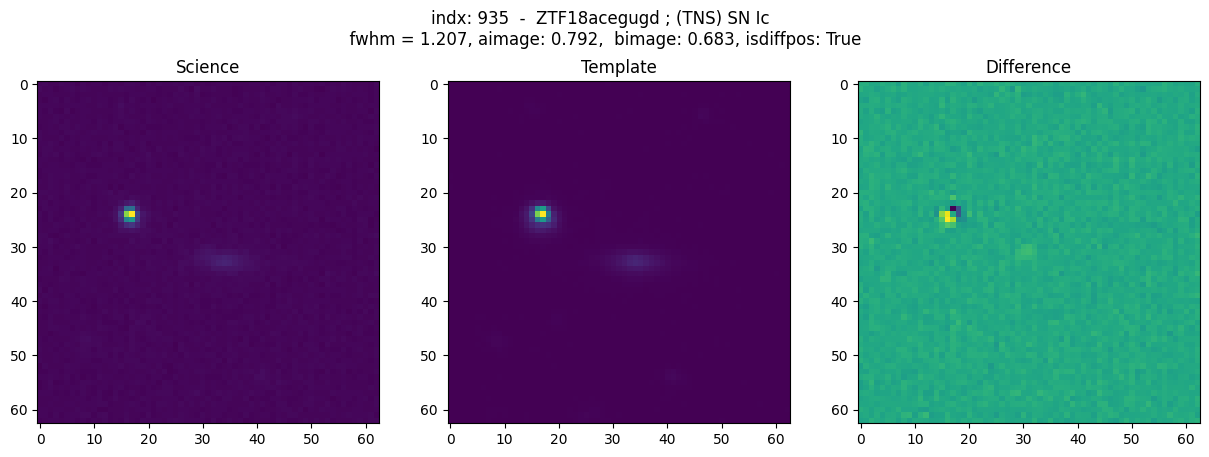

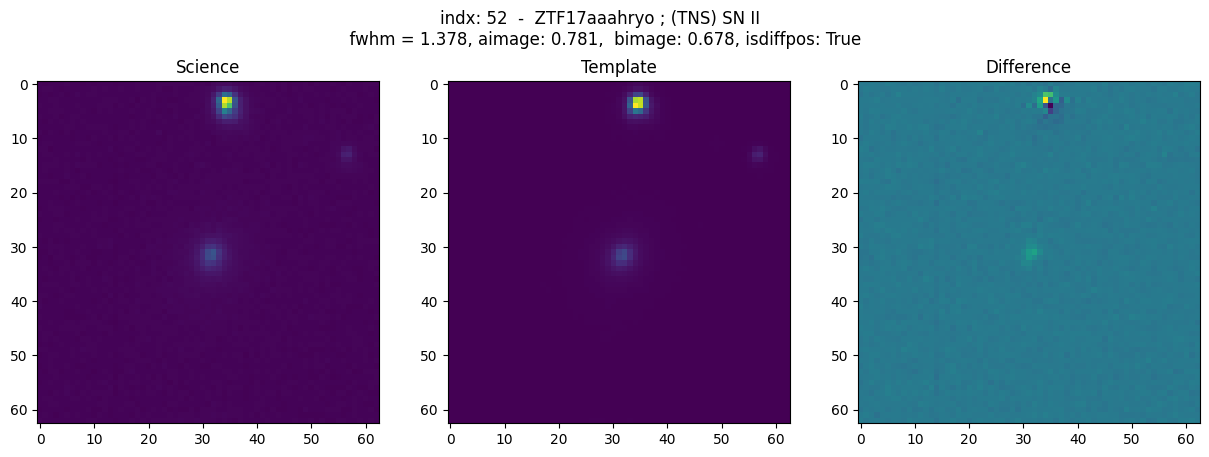

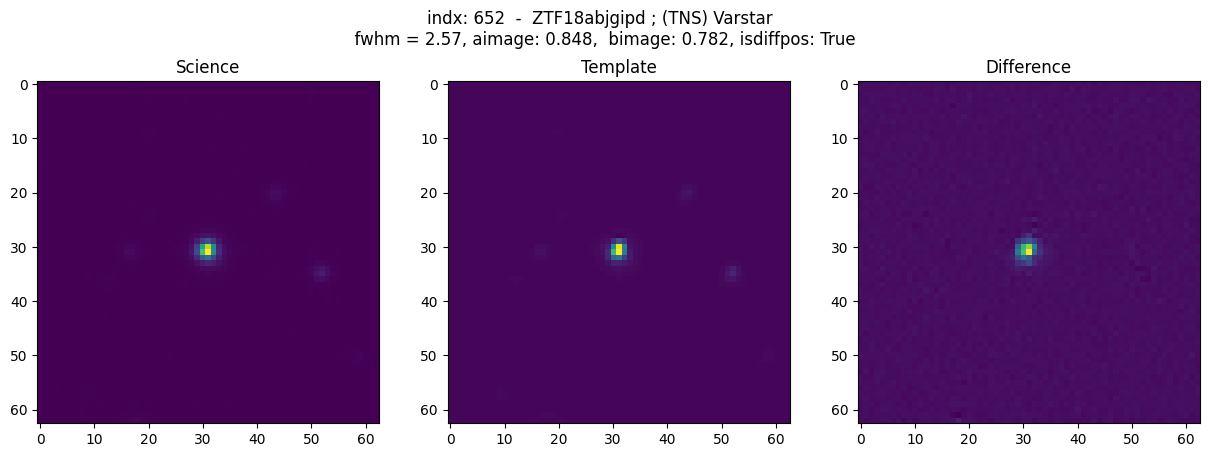

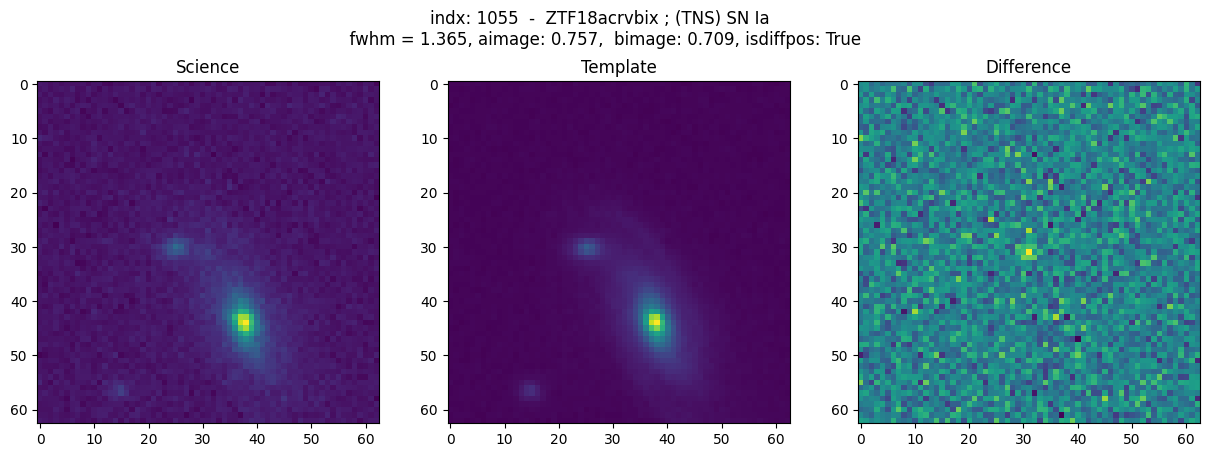

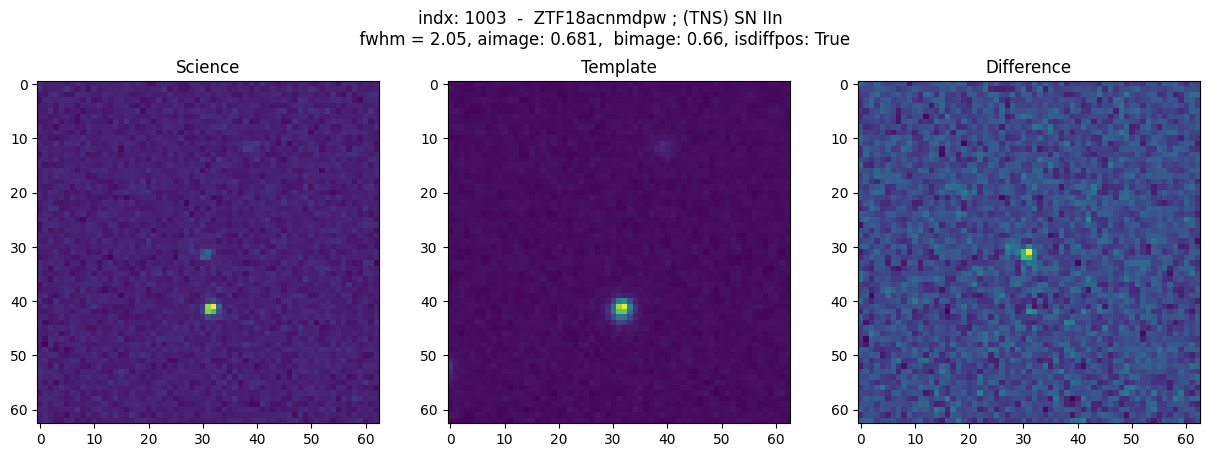

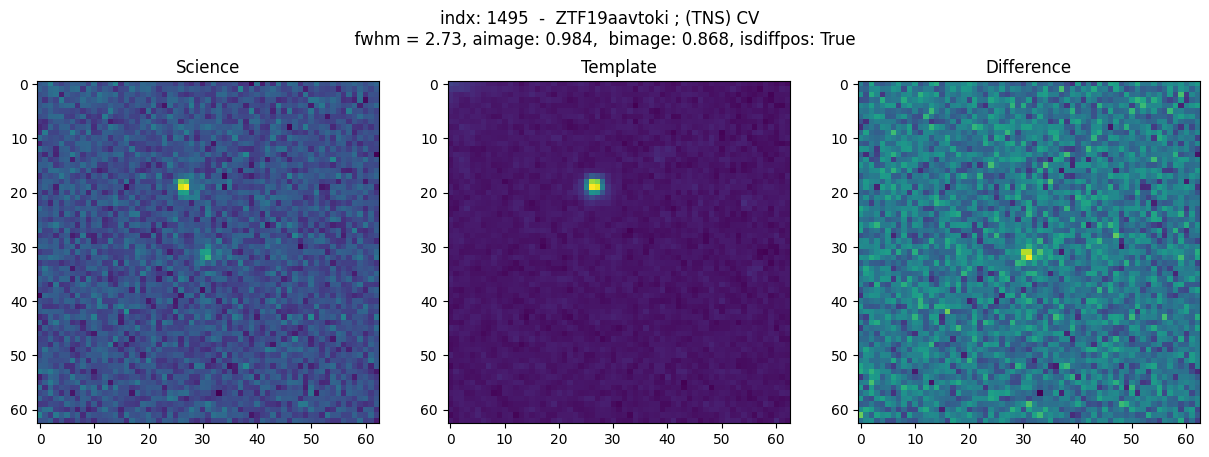

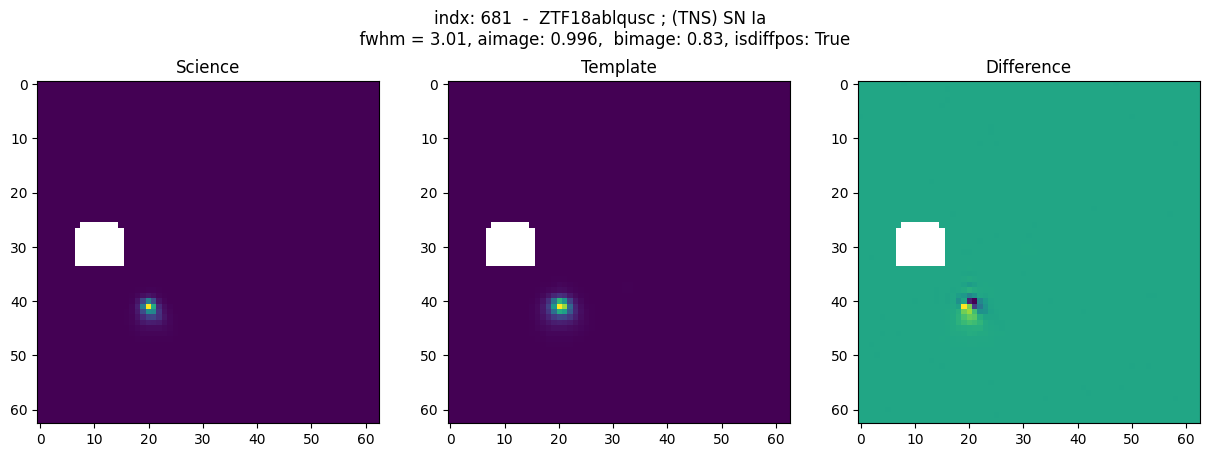

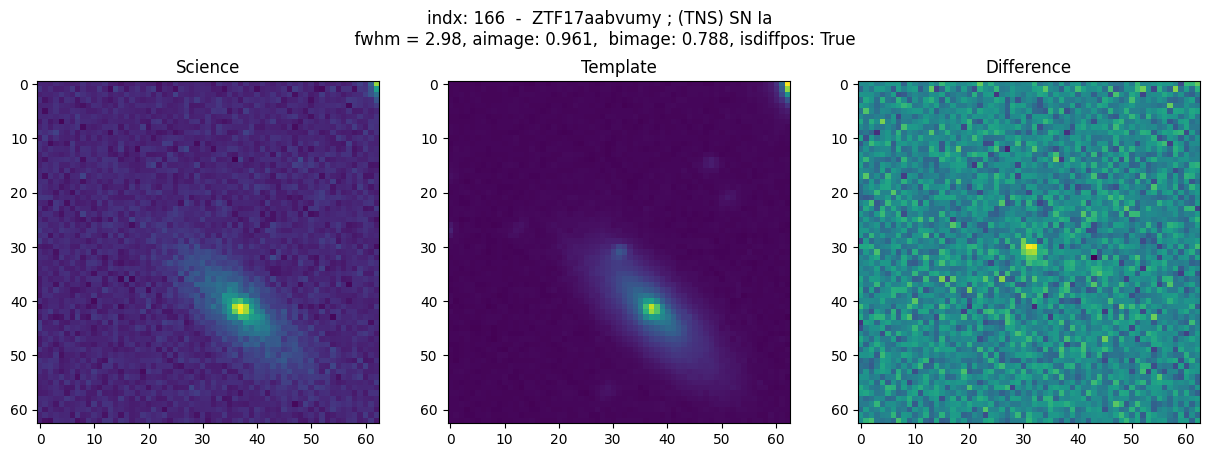

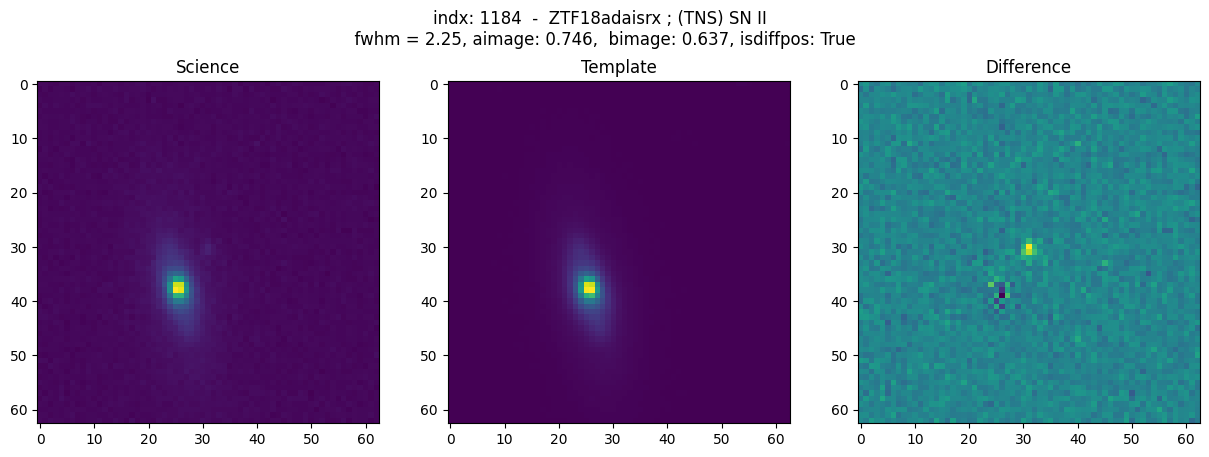

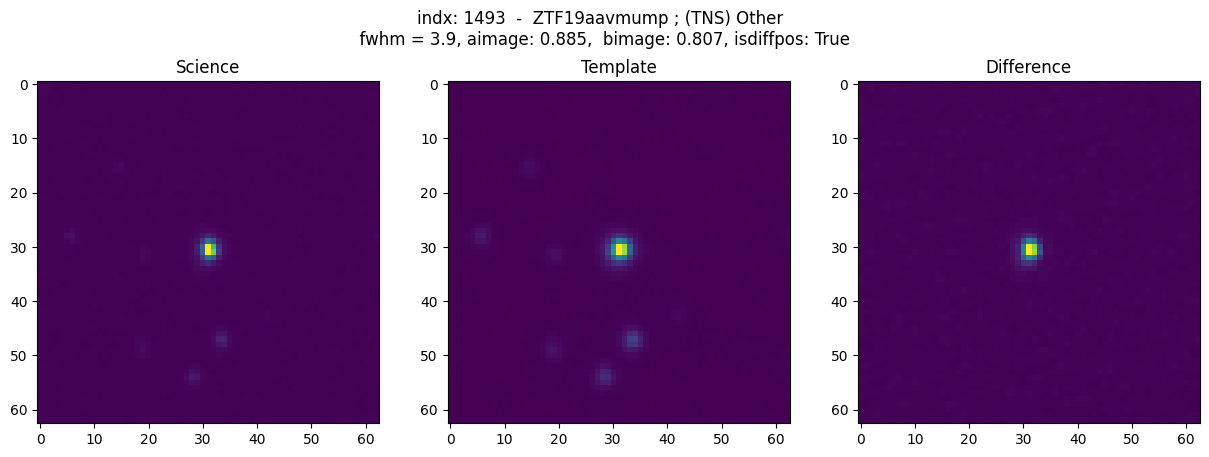

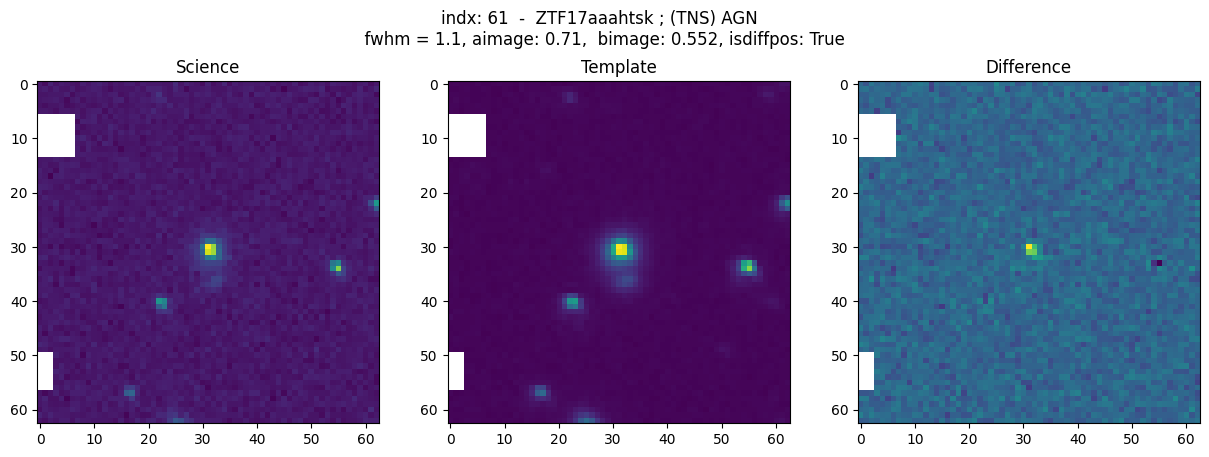

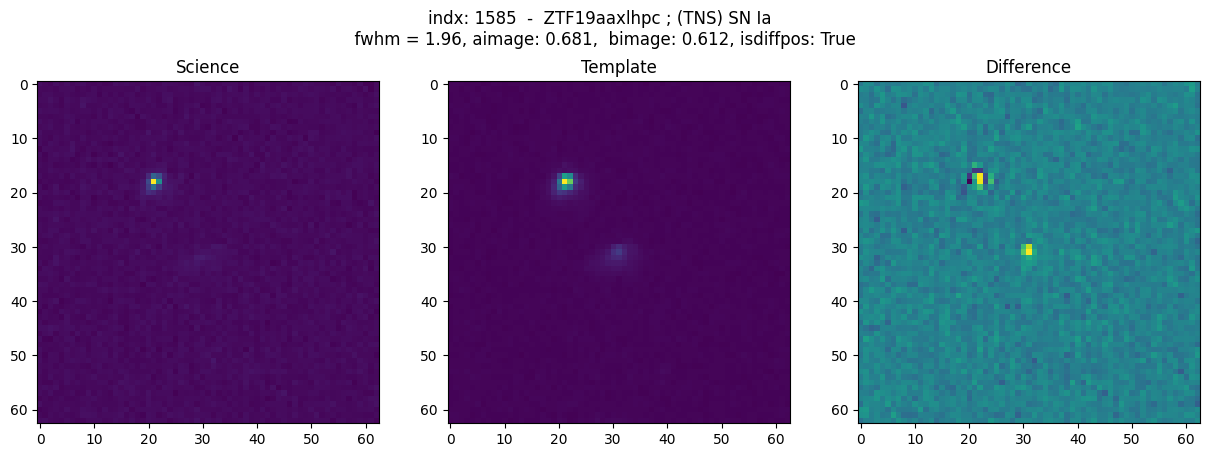

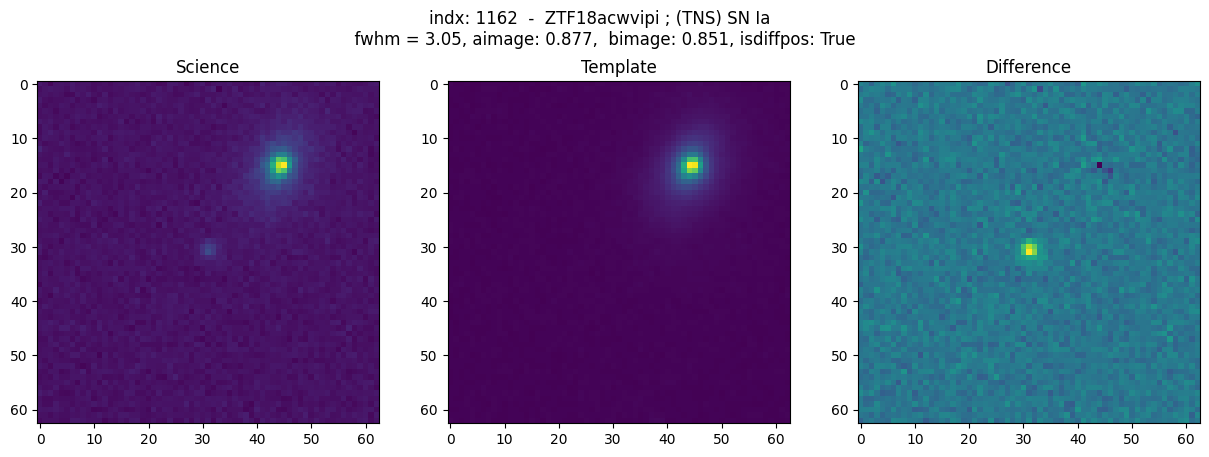

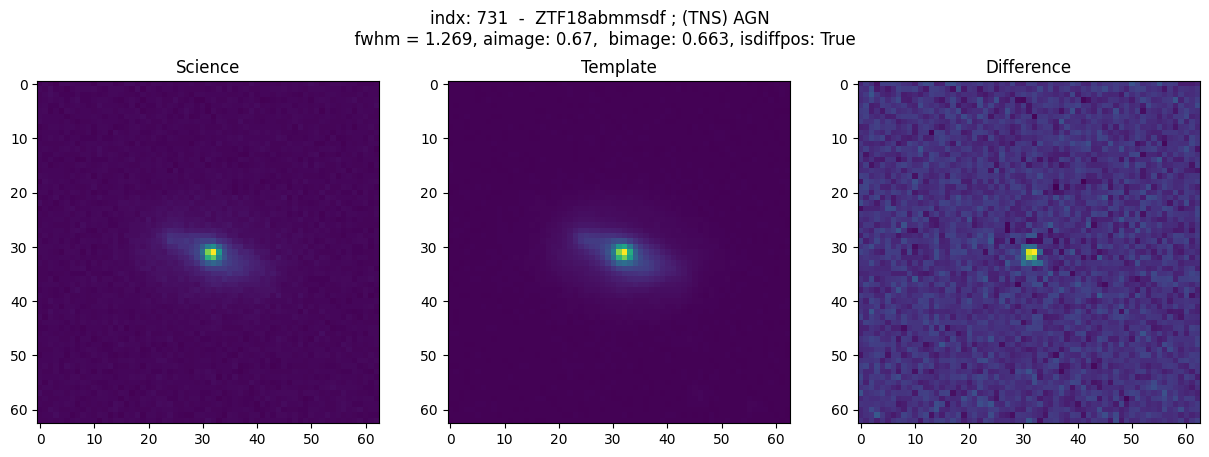

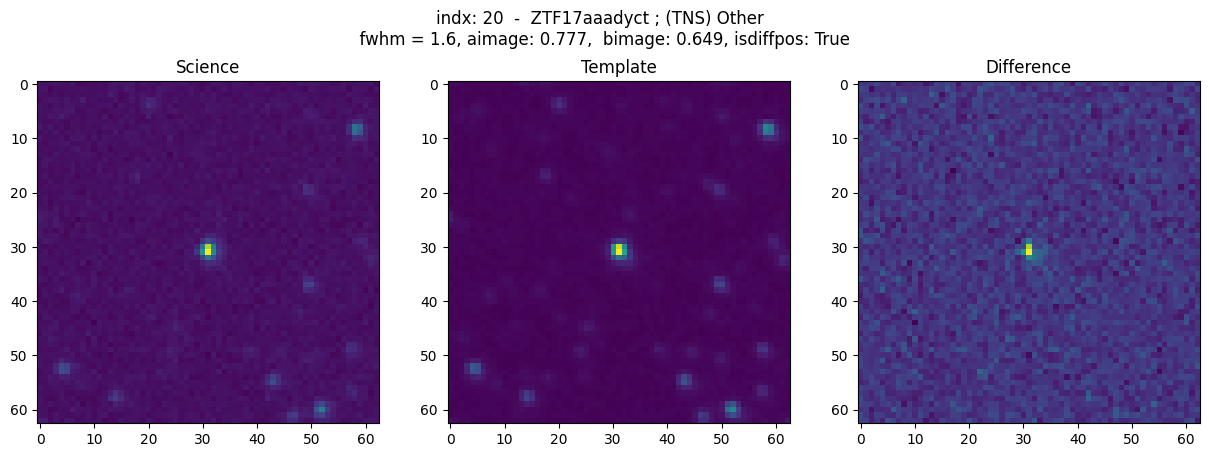

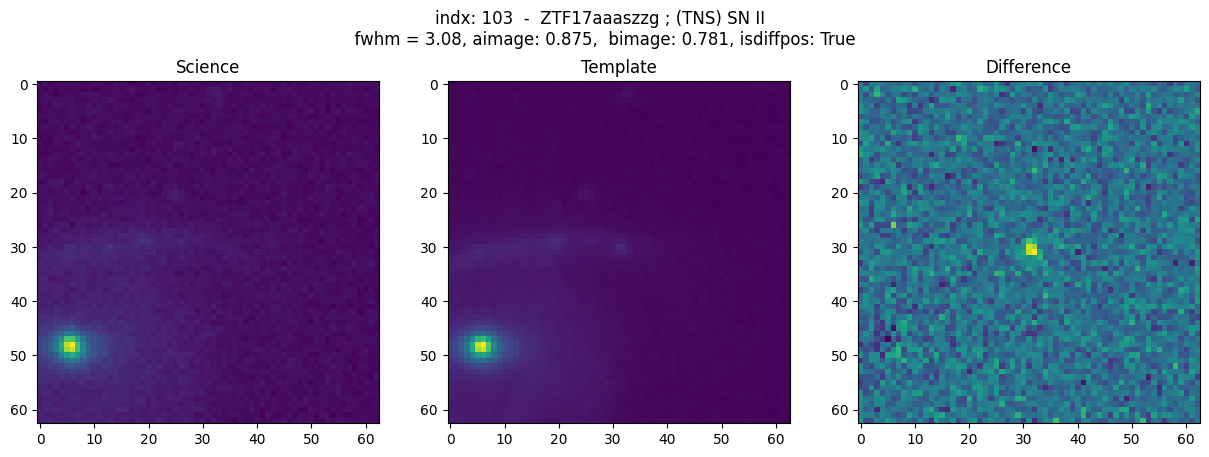

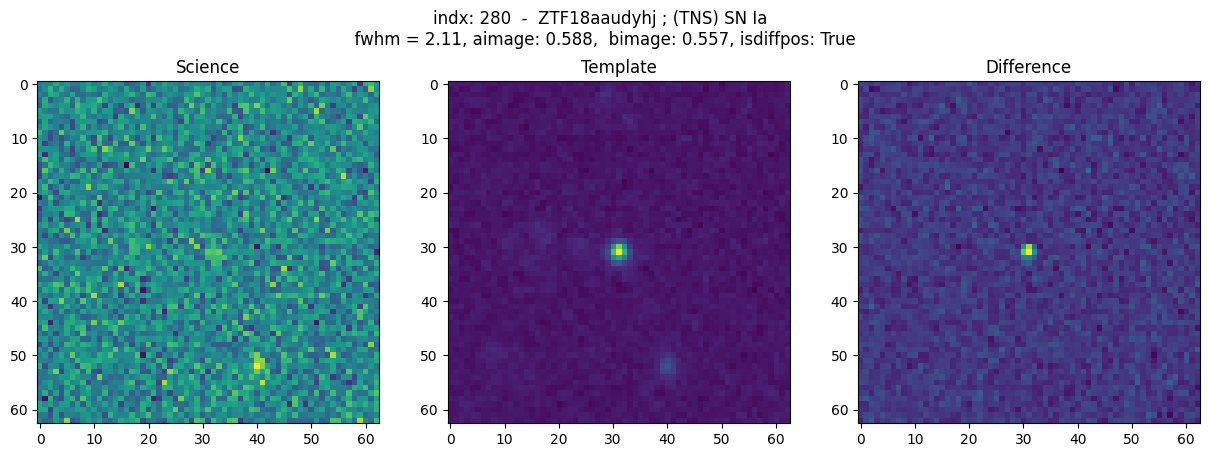

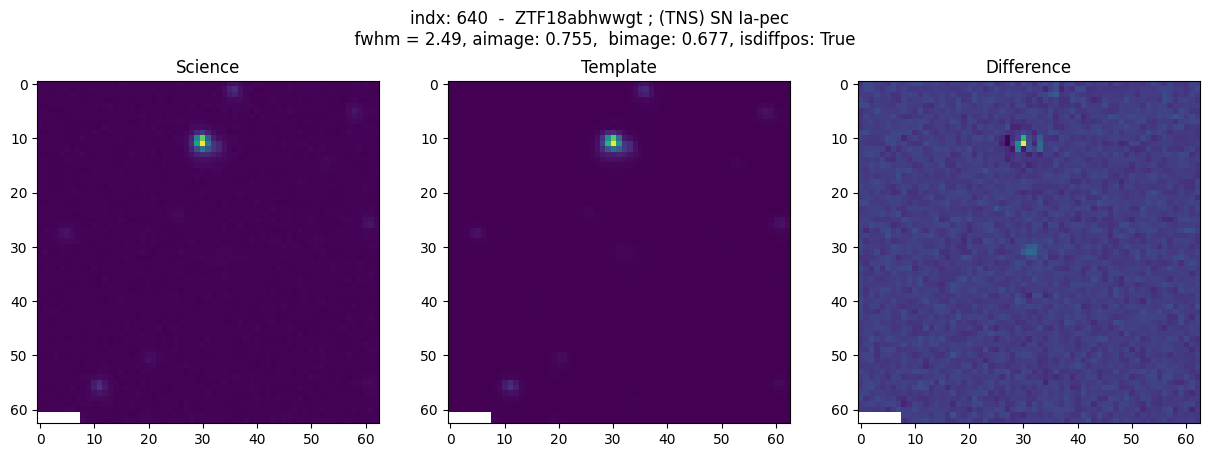

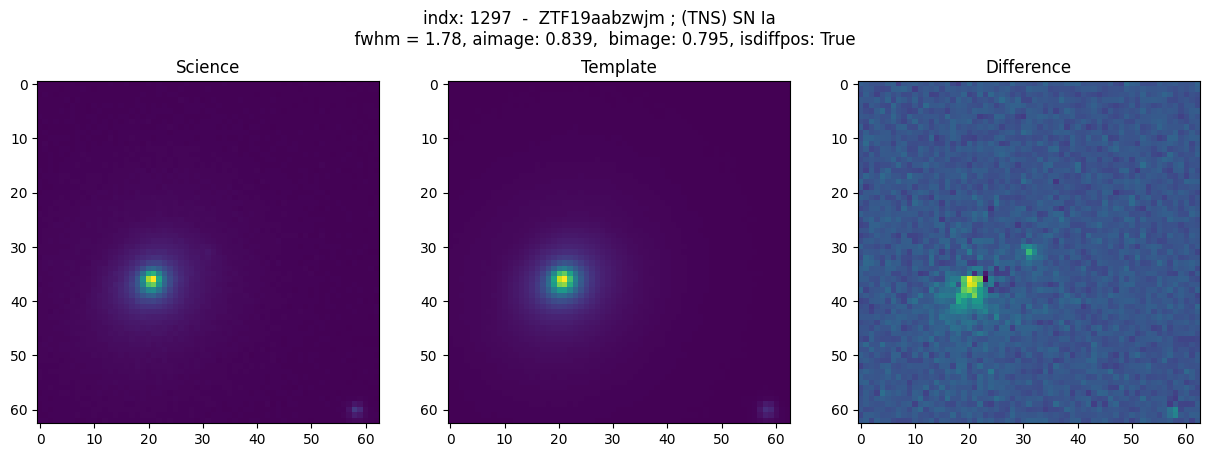

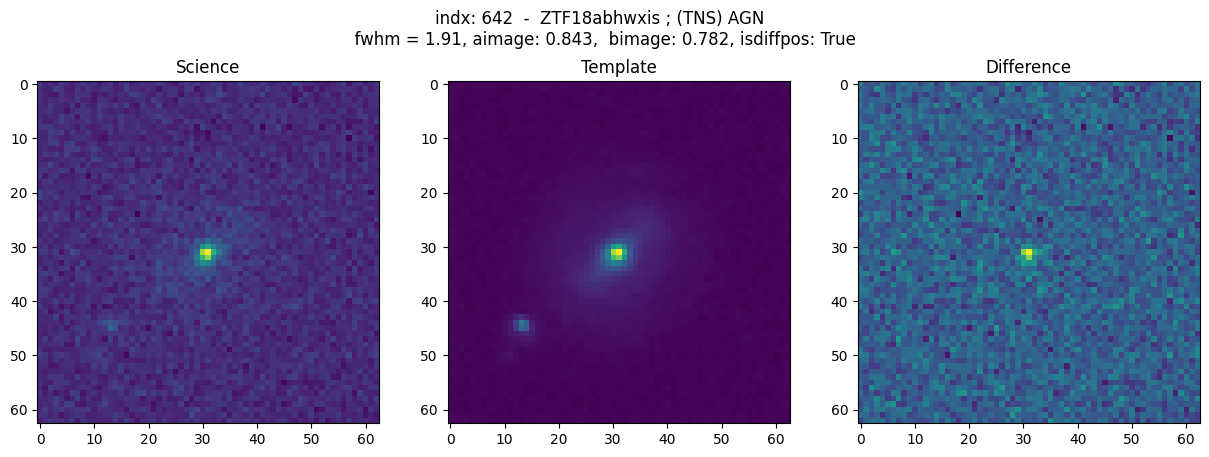

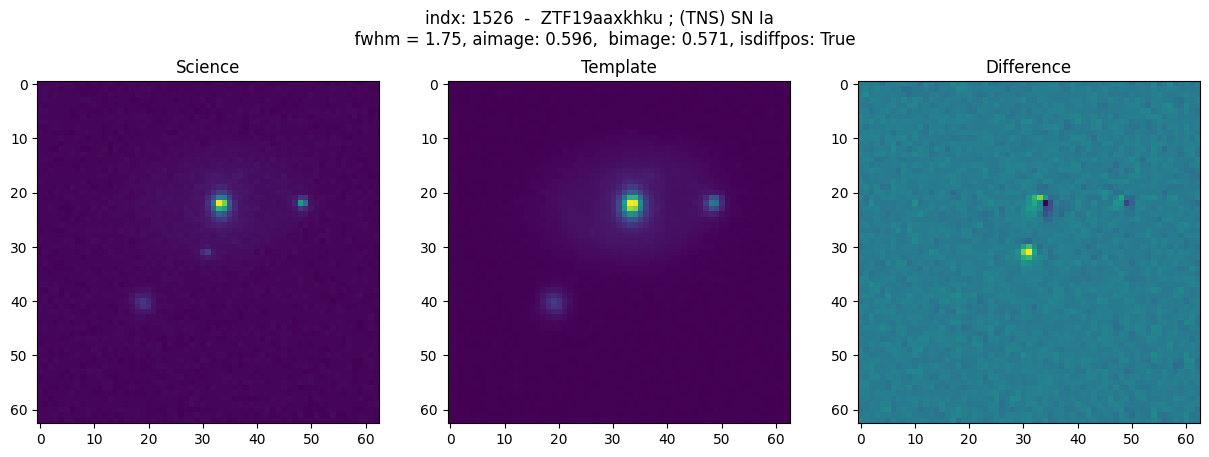

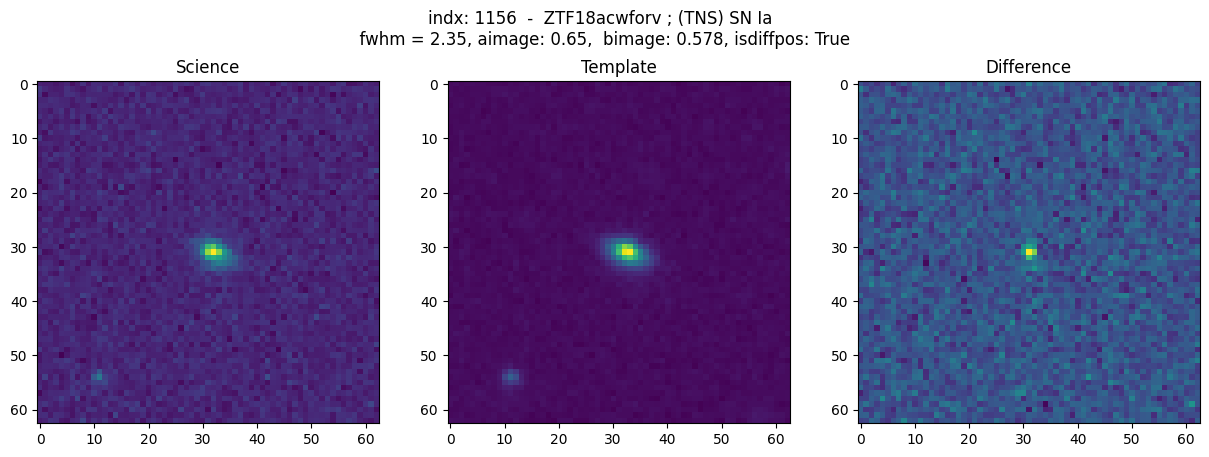

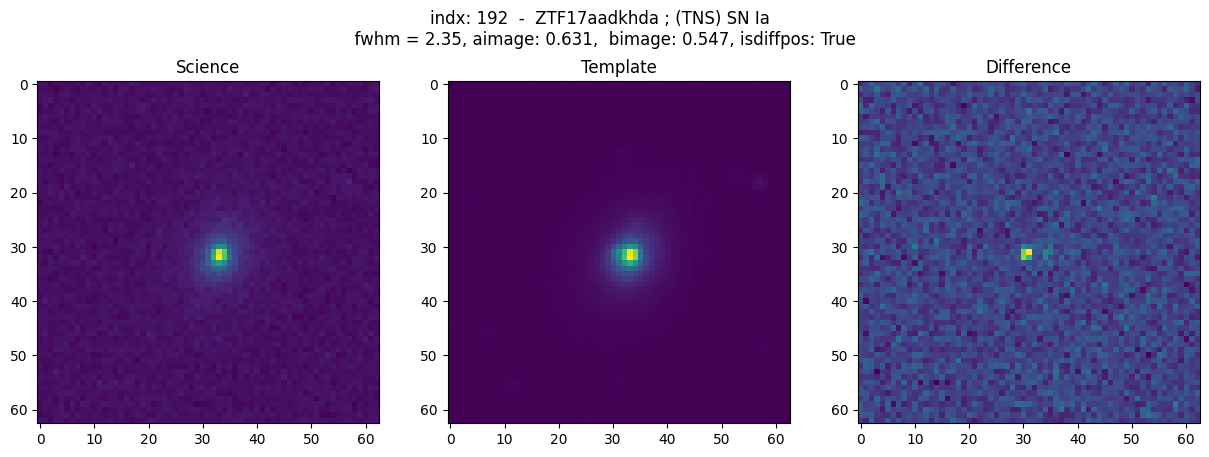

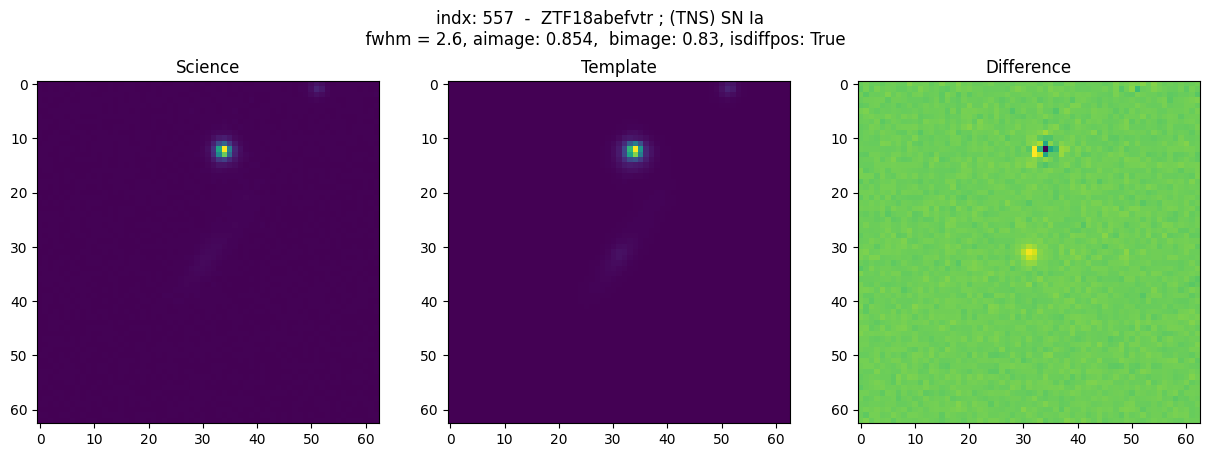

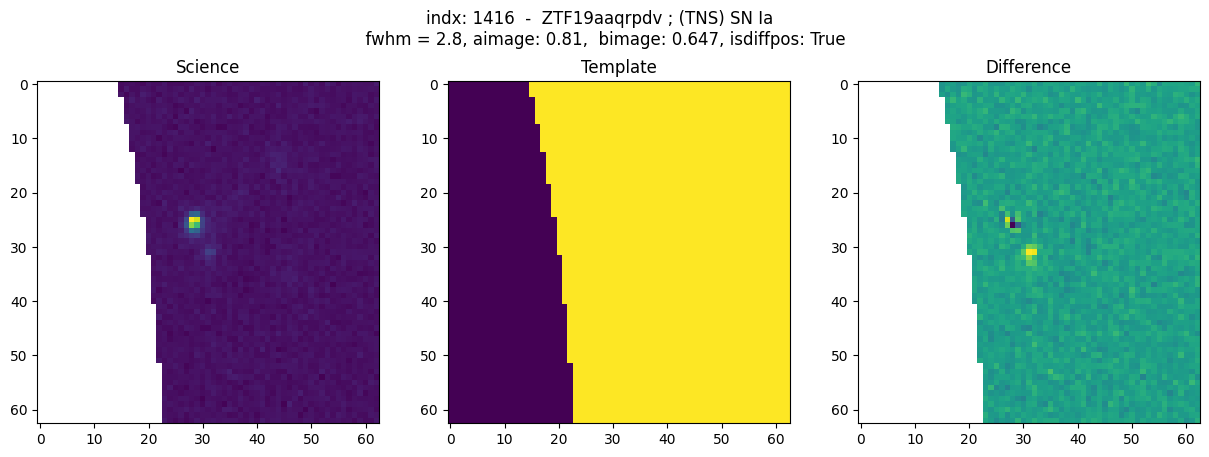

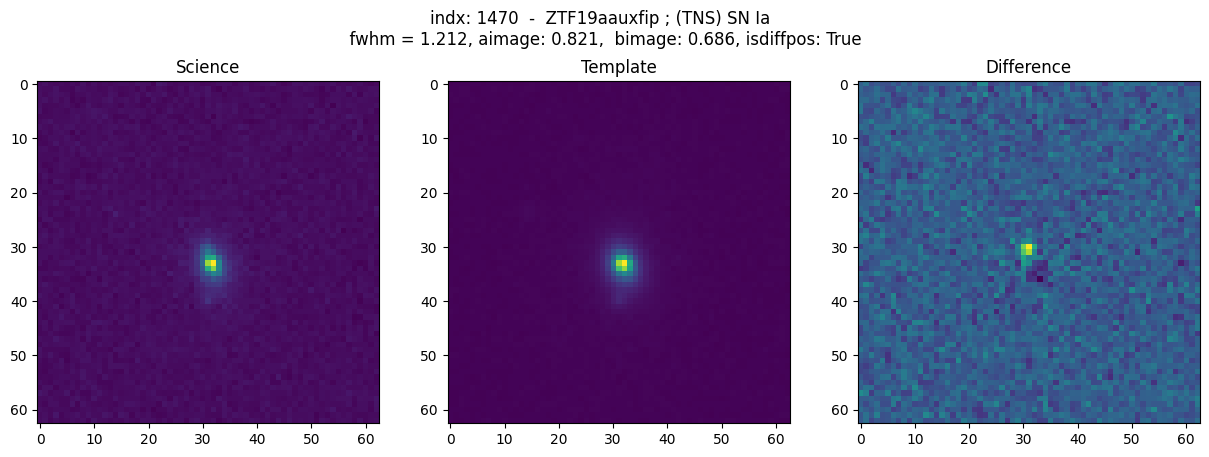

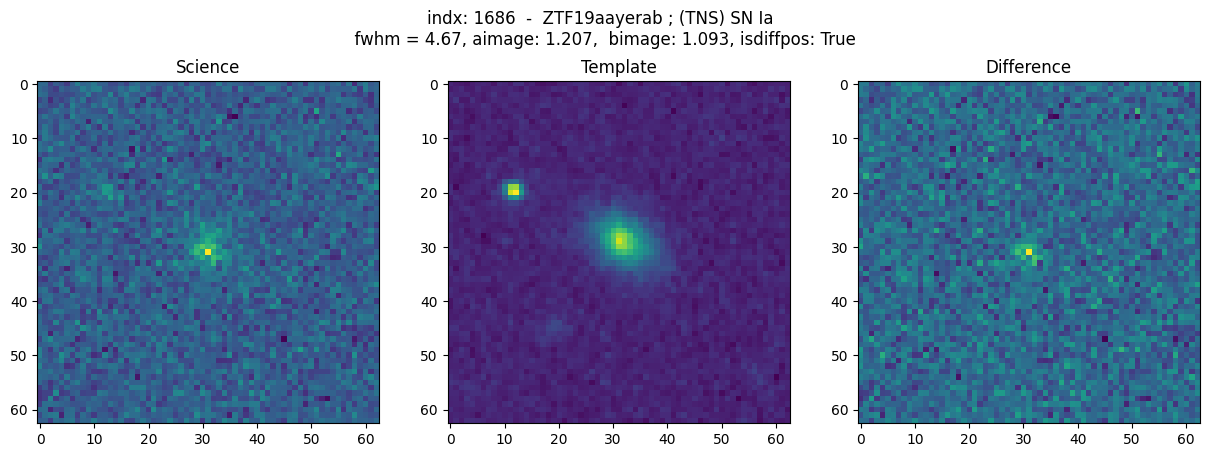

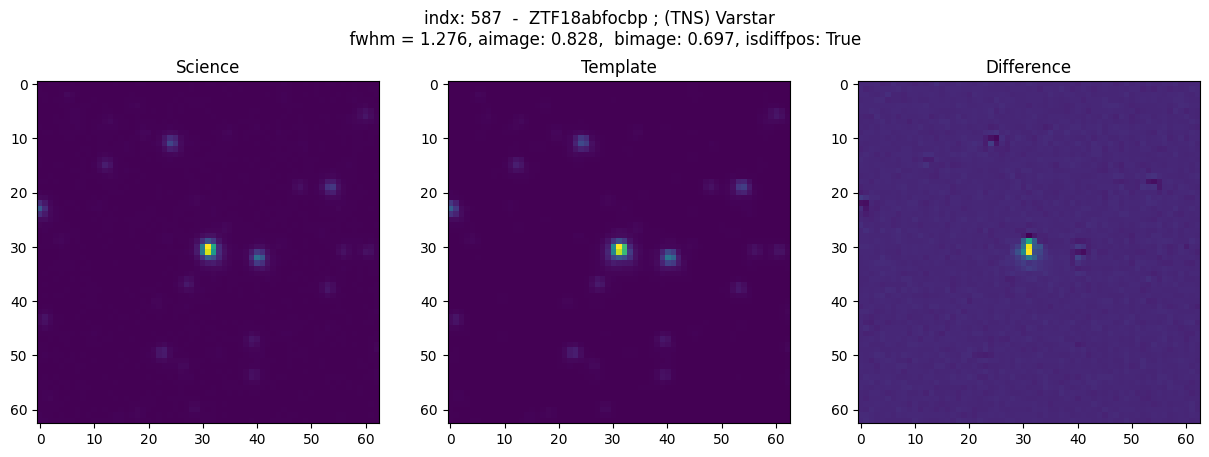

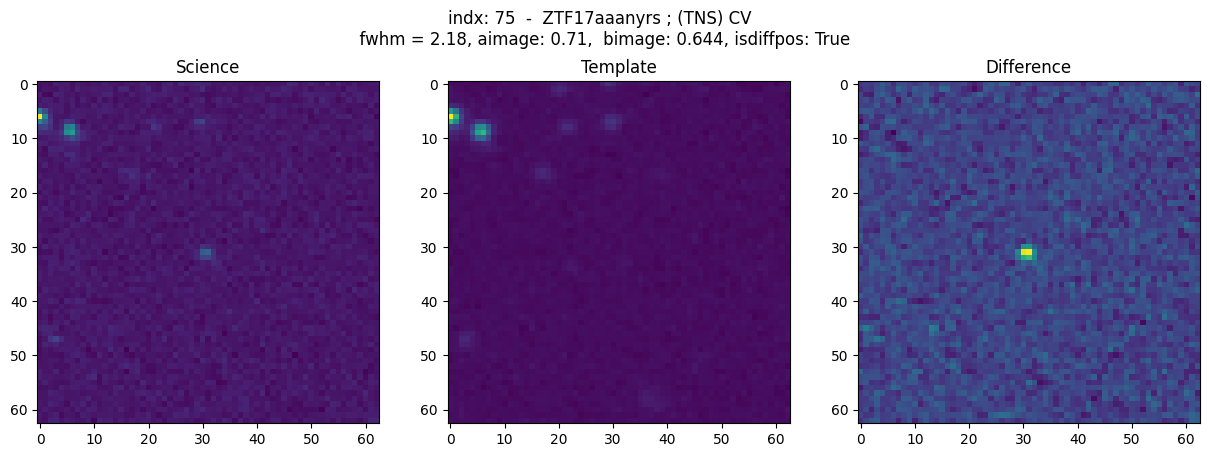

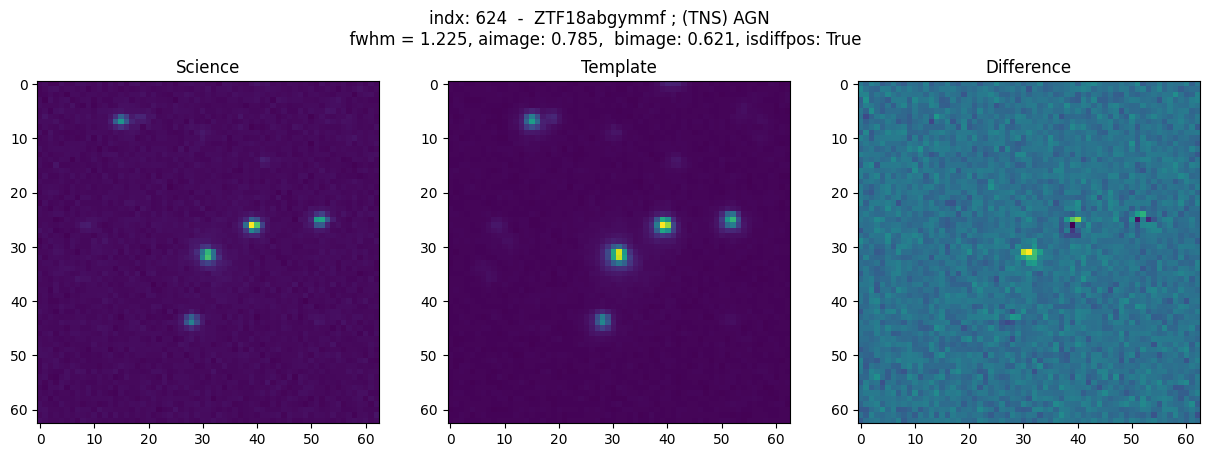

In [17]:
# plot
columns = [
    'b:cutoutScience_stampData',
    'b:cutoutTemplate_stampData',
    'b:cutoutDifference_stampData'
]

title = ['Science', 'Template', 'Difference']

# number of stamps set to plot
n_to_plot = 30

# select a random alert
for indx in np.random.choice(np.arange(xmatch.shape[0]), size=n_to_plot, replace=False):
    
    fig, axes = plt.subplots(1,3, figsize=(15,5))
    objid = xmatch_tns.iloc[indx]['i:objectId']
    fwhm = str(round(xmatch.iloc[indx]['i:fwhm'], 3))
    aimage = str(round(xmatch.iloc[indx]['i:aimage'], 3))
    bimage = str(round(xmatch.iloc[indx]['i:bimage'], 3))
    isdiffpos = str(bool(xmatch.iloc[indx]['i:isdiffpos']))
    classname = str(xmatch.iloc[indx]['class'])
    
    fig.suptitle('indx: ' + str(indx) + '  -  ' + objid + ' ; ' + classname + '\n  fwhm = ' + fwhm + ', ' + \
                'aimage: ' + aimage + ',  bimage: ' + bimage + ', isdiffpos: ' + isdiffpos)

    for i,ax in enumerate(axes.flat):
        ax.set_title(title[i])
        data = np.array(xmatch[columns[i]].values[indx])

        ax.imshow(data.astype(float))

    plt.show()